# 线性回归模型

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data, housing.target,random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

In [4]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train_scaled = transfer.fit_transform(x_train)
x_test_scaled = transfer.transform(x_test)
x_valid_scaled = transfer.transform(x_valid)

In [5]:
# KerasRegressor
# 1.转化为sklearn的model
# 2.定义参数集合
# 3.搜索参数
def build_model(hidden_layers=1,
                       layer_size = 30,
                       learnning_rate = 3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation='relu', input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(layer_size, activation='relu'))
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.SGD(learnning_rate)
    model.compile(loss='mean_squared_error',
                 optimizer = optimizer )
    return model
sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)

callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history = sklearn_model.fit(x_train_scaled,y_train,epochs=100,
                  validation_data=(x_valid_scaled,y_valid), 
                  callbacks= callbacks )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 110us/sample - loss: 1.5511 - val_loss: 0.7658
Epoch 2/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.6431 - val_loss: 0.6696
Epoch 3/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5899 - val_loss: 0.6181
Epoch 4/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5501 - val_loss: 0.5850
Epoch 5/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5208 - val_loss: 0.5422
Epoch 6/100
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5015 - val_loss: 0.5172
Epoch 7/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4835 - val_loss: 0.5044
Epoch 8/100
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4703 - val_loss: 0.4904
Epoch 9/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.45

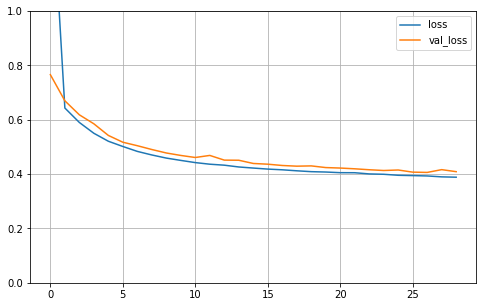

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [7]:
# model.evaluate(x_test_scaled,y_test，verbose=2)
#sklearn_model没有evaluate函数

In [ ]:
from scipy.stats import reciprocal
param_distribution={
    'hidden_layers': [1,2,3,4,5,],
    'layer_size': np.arange(1,100),
    'learnning_rate': reciprocal(1e-4,1e-2)
    }
from sklearn.model_selection import RandomizedSearchCV
estimator = RandomizedSearchCV(sklearn_model, #模型estimator
                                                 param_distribution,#定义好的搜索空间
                                                 n_iter = 10,#要搜索的参数集合数量
#                                                  n_jobs = 1，#并行处理数据数量
                                                  )

callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
estimator.fit(x_train_scaled,y_train,epochs=100,
                  validation_data=(x_valid_scaled,y_valid), 
                  callbacks= callbacks)

Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 105us/sample - loss: 2.8474 - val_loss: 1.9024
Epoch 2/100
9288/9288 [==============================] - 1s 79us/sample - loss: 1.5700 - val_loss: 1.4193
Epoch 3/100
9288/9288 [==============================] - 1s 80us/sample - loss: 1.2268 - val_loss: 1.0881
Epoch 4/100
9288/9288 [==============================] - 1s 78us/sample - loss: 0.9571 - val_loss: 0.8509
Epoch 5/100
9288/9288 [==============================] - 1s 78us/sample - loss: 0.8027 - val_loss: 0.7620
Epoch 6/100
9288/9288 [==============================] - 1s 78us/sample - loss: 0.7407 - val_loss: 0.7265
Epoch 7/100
9288/9288 [==============================] - 1s 77us/sample - loss: 0.7061 - val_loss: 0.7012
Epoch 8/100
9288/9288 [==============================] - 1s 80us/sample - loss: 0.6774 - val_loss: 0.6754
Epoch 9/100
9288/9288 [==============================] - 1s 78us/sample - loss: 0.6504 - val_loss: 0.65

9288/9288 [==============================] - 1s 105us/sample - loss: 3.1347 - val_loss: 2.0369
Epoch 2/100
9288/9288 [==============================] - 1s 78us/sample - loss: 1.5570 - val_loss: 1.4913
Epoch 3/100
9288/9288 [==============================] - 1s 78us/sample - loss: 1.3376 - val_loss: 1.4056
Epoch 4/100
9288/9288 [==============================] - 1s 78us/sample - loss: 1.3074 - val_loss: 1.3896
Epoch 5/100
9288/9288 [==============================] - 1s 77us/sample - loss: 1.3032 - val_loss: 1.3855
Epoch 6/100
9288/9288 [==============================] - 1s 78us/sample - loss: 1.3025 - val_loss: 1.3847
Epoch 7/100
9288/9288 [==============================] - 1s 77us/sample - loss: 1.3025 - val_loss: 1.3841
Epoch 8/100
9288/9288 [==============================] - 1s 79us/sample - loss: 1.3024 - val_loss: 1.3840
Epoch 9/100
2322/2322 [==============================] - 0s 40us/sample - loss: 1.3586
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [=====

9288/9288 [==============================] - 1s 85us/sample - loss: 0.3781 - val_loss: 0.3935
Epoch 33/100
9288/9288 [==============================] - 1s 84us/sample - loss: 0.3761 - val_loss: 0.3914
Epoch 34/100
9288/9288 [==============================] - 1s 84us/sample - loss: 0.3732 - val_loss: 0.3902
Epoch 35/100
9288/9288 [==============================] - 1s 84us/sample - loss: 0.3718 - val_loss: 0.3876
Epoch 36/100
2322/2322 [==============================] - 0s 43us/sample - loss: 0.3522
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 114us/sample - loss: 2.4844 - val_loss: 1.3808
Epoch 2/100
9288/9288 [==============================] - 1s 83us/sample - loss: 1.0389 - val_loss: 0.8939
Epoch 3/100
9288/9288 [==============================] - 1s 83us/sample - loss: 0.7547 - val_loss: 0.7322
Epoch 4/100
9288/9288 [==============================] - 1s 84us/sample - loss: 0.6593 - val_loss: 0.6699
Epoch 5/100
9288/9288 [=

9288/9288 [==============================] - 1s 95us/sample - loss: 0.3888 - val_loss: 0.4165
Epoch 30/100
9288/9288 [==============================] - 1s 94us/sample - loss: 0.3857 - val_loss: 0.4168
Epoch 31/100
9288/9288 [==============================] - 1s 94us/sample - loss: 0.3827 - val_loss: 0.4117
Epoch 32/100
9288/9288 [==============================] - 1s 94us/sample - loss: 0.3794 - val_loss: 0.4082
Epoch 33/100
9288/9288 [==============================] - 1s 94us/sample - loss: 0.3768 - val_loss: 0.4056
Epoch 34/100
9288/9288 [==============================] - 1s 89us/sample - loss: 0.3746 - val_loss: 0.4033
Epoch 35/100
9288/9288 [==============================] - 1s 83us/sample - loss: 0.3724 - val_loss: 0.3980
Epoch 36/100
9288/9288 [==============================] - 1s 84us/sample - loss: 0.3698 - val_loss: 0.3953
Epoch 37/100
9288/9288 [==============================] - 1s 83us/sample - loss: 0.3676 - val_loss: 0.3964
Epoch 38/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 80us/sample - loss: 0.5043 - val_loss: 0.5355
Epoch 23/100
9288/9288 [==============================] - 1s 81us/sample - loss: 0.4986 - val_loss: 0.5292
Epoch 24/100
9288/9288 [==============================] - 1s 80us/sample - loss: 0.4932 - val_loss: 0.5232
Epoch 25/100
9288/9288 [==============================] - 1s 81us/sample - loss: 0.4882 - val_loss: 0.5181
Epoch 26/100
9288/9288 [==============================] - 1s 81us/sample - loss: 0.4834 - val_loss: 0.5127
Epoch 27/100
9288/9288 [==============================] - 1s 80us/sample - loss: 0.4790 - val_loss: 0.5075
Epoch 28/100
9288/9288 [==============================] - 1s 81us/sample - loss: 0.4747 - val_loss: 0.5028
Epoch 29/100
9288/9288 [==============================] - 1s 80us/sample - loss: 0.4708 - val_loss: 0.4986
Epoch 30/100
9288/9288 [==============================] - 1s 81us/sample - loss: 0.4670 - val_loss: 0.4948
Epoch 31/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 87us/sample - loss: 0.4056 - val_loss: 0.4512
Epoch 22/100
9288/9288 [==============================] - 1s 87us/sample - loss: 0.4061 - val_loss: 0.4107
Epoch 23/100
9288/9288 [==============================] - 1s 88us/sample - loss: 0.4006 - val_loss: 0.4200
Epoch 24/100
9288/9288 [==============================] - 1s 88us/sample - loss: 0.4021 - val_loss: 0.4175
Epoch 25/100
9288/9288 [==============================] - 1s 88us/sample - loss: 0.3977 - val_loss: 0.4115
Epoch 26/100
9288/9288 [==============================] - 1s 87us/sample - loss: 0.3976 - val_loss: 0.4233
Epoch 27/100
2322/2322 [==============================] - 0s 44us/sample - loss: 0.3870
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 120us/sample - loss: 1.5303 - val_loss: 1.1452
Epoch 2/100
9288/9288 [==============================] - 1s 87us/sample - loss: 0.9373 - val_loss: 0.8485
Epoch 3/100
1568/9288 

In [ ]:
# reciprocal函数演示
# from scipy.stats import reciprocal
# # f(x) = 1/(x*log(b/a))     a<x<b
# reciprocal.rvs(1e-4, 1e-2, size =10)

In [ ]:
#最佳参数
print('最佳参数：\n',estimator.best_params_)
#最佳结果
print('最佳结果:\n',estimator.best_score_)
#最佳估计器
print('最佳估计器：\n',estimator.best_estimator_)
#交叉验证结果
# print('交叉验证结果:\n',estimator.cv_results_)

In [ ]:
model = estimator.best_estimator_.model
model.evaluate(x_test_scaled, y_test)